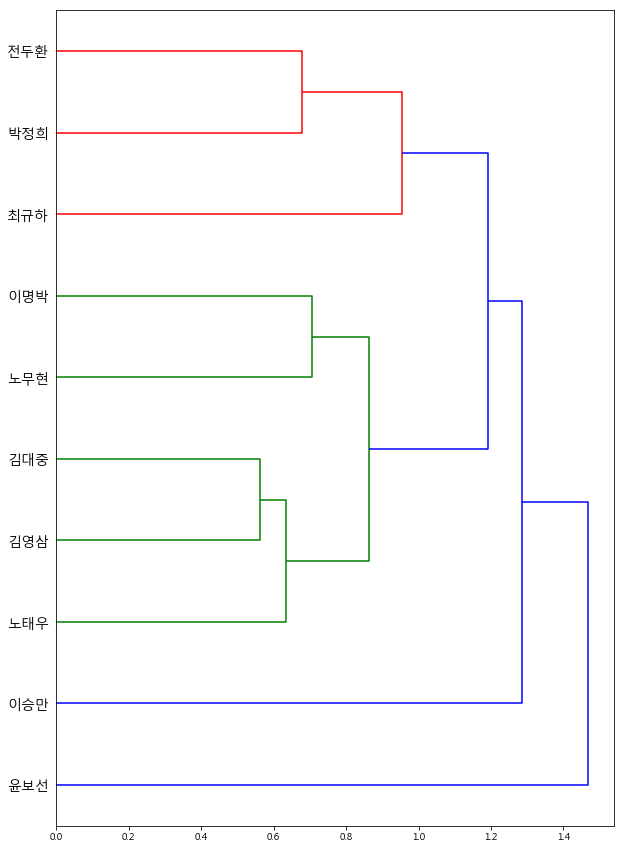

In [1]:
# 대통령 연설문의 계층적 군집화
import sys
from collections import defaultdict
import ujson
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt

INPUT_FILE_NAME = "../data/speeches/speeches.ma.txt"
OUTPUT_FILE_NAME = "../data/speeches/speeches.dendro.png"
FEATURE_POSES = ["NC", "NQ"]
MA_KEY = "body_ma"
PRES_KEY = "president"
FIELD_KEY = "field"
FIELD_VAL = "국정전반"


def read_president_documents(input_file_name):
    """역대 대통령별 국정전반 연설문을 읽어서 돌려준다."""
    
    president_documents = defaultdict(list)

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            json_obj = ujson.loads(line)
            
            if json_obj[FIELD_KEY] != FIELD_VAL:
                continue
            
            president = json_obj[PRES_KEY]
            morphs = []

            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if morph_cat not in FEATURE_POSES:
                        continue

                    morphs.append(morph_lex)
                    
            president_documents[president].extend(morphs)
            
    presidents = []
    documents = []
    
    for president, document in president_documents.items():
        presidents.append(president)
        documents.append(" ".join(document))
            
    return presidents, documents


def build_doc_term_mat(documents):
    """주어진 문서 집합으로부터 문서-어휘 행렬를 생성하여 돌려준다."""
    
    vectorizer = TfidfVectorizer(tokenizer=str.split)
    doc_term_mat = vectorizer.fit_transform(documents)

    return doc_term_mat


def get_hier_clusters(doc_term_mat):
    """주어진 문서-어휘 행렬로부터 계층적 군집을 생성하여 돌려준다."""
    
    clusters = linkage(doc_term_mat.toarray(), "ward")

    return clusters


def plot_linkage(clusters, presidents):
    """주어진 군집과 대통령 목록으로 수형도를 생성하여 표시한다."""
    
    set_fonts()
    plt.figure(figsize=(10, 15))
    dendrogram(clusters, orientation="right", labels=presidents,
               leaf_font_size=14)
    plt.show()
    

def set_fonts():
    """시각화를 위한 글꼴을 지정한다."""
    
    if sys.platform.startswith("win"):
        matplotlib.rc("font", family="Malgun Gothic")
    elif sys.platform.startswith("darwin"):
        matplotlib.rc("font", family="AppleGothic")   
    
    
def main():
    input_file_name = "../data/speeches/speeches.ma.txt"
    presidents, documents = read_president_documents(input_file_name)
    doc_term_mat = build_doc_term_mat(documents)
    clusters = get_hier_clusters(doc_term_mat)
    plot_linkage(clusters, presidents)

    
# 실행
main()